<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


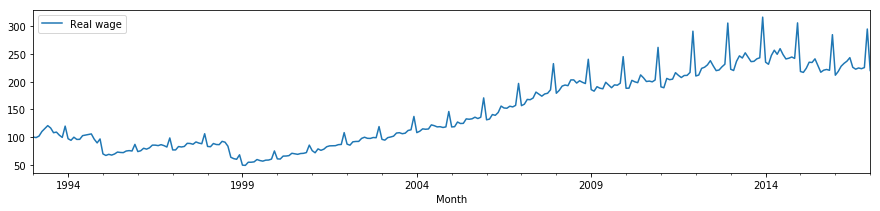

In [1]:
# start with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
import statsmodels.api as sm


from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing

%matplotlib inline


ts = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

ts.plot(figsize=(15,3))

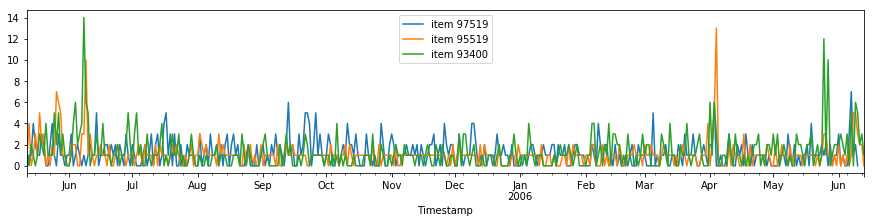

In [2]:
ts_dep36 = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

ts_dep36[ts_dep36.columns[:8]].plot(figsize=(15,3))

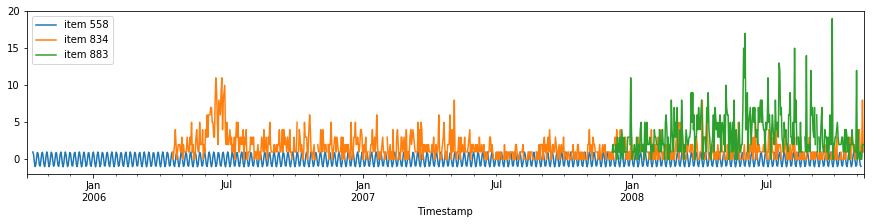

In [3]:
ts_dep42 = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

ts_dep42[ts_dep42.columns[:3]].plot(figsize=(15,3))

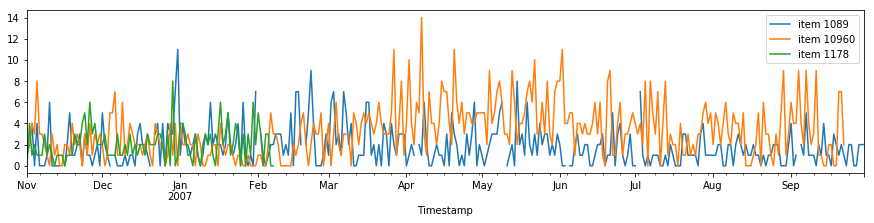

In [4]:
ts_dep6 = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

ts_dep6[ts_dep6.columns[:3]].plot(figsize=(15,3))

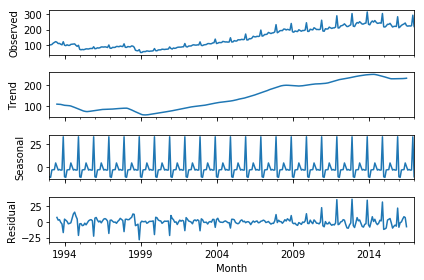

In [5]:
res = sm.tsa.seasonal_decompose(ts)
resplot = res.plot()

<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

In [6]:
ts1 = ts.loc['1998-01-09':'2015-01-01']

In [7]:
def qualitySSE(x,y):
    # Sum squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum()#, (x-y)**2

In [8]:
def SSE(df, alpha):
    y = [df.iloc[0]['Real wage']]
    for i in range(len(df)):
        y.append(alpha*df.iloc[i]['Real wage'] + (1-alpha)*y[-1])
    return y    

In [13]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.7, 0.8, 1]
for alpha in alphas:
    print 'for alpha = '+ str(alpha)+'  loss is : ', qualitySSE(np.array(SSE(ts1, alpha)[:-1]),np.array(ts1['Real wage']))

for alpha = 0.01  loss is :  734289.078739
for alpha = 0.05  loss is :  122991.545778
for alpha = 0.1  loss is :  68874.7412496
for alpha = 0.2  loss is :  54694.525955
for alpha = 0.3  loss is :  54583.6248585
for alpha = 0.4  loss is :  57182.8921205
for alpha = 0.5  loss is :  60870.2205132
for alpha = 0.7  loss is :  70221.9780833
for alpha = 0.8  loss is :  75854.9143766
for alpha = 1  loss is :  89680.3887


In [14]:
ts1_1 = ts.loc['1998-01-09':'2017-01-01']

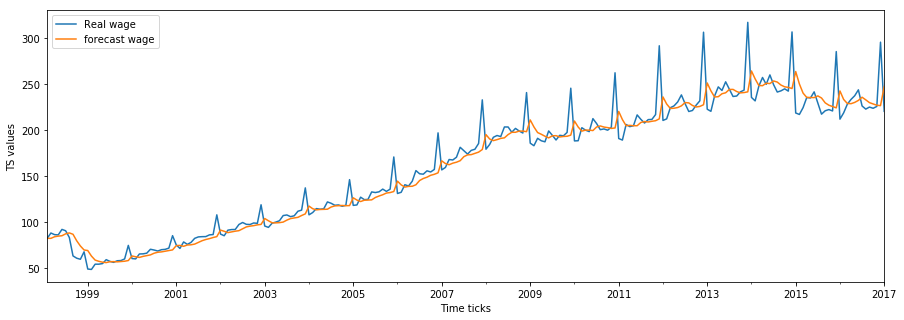

In [15]:
forecast = pd.DataFrame(index = ts1_1.index)
forecast['forecast wage'] = np.array(SSE(ts1_1, 0.3)[:-1])

ts1_1.merge(forecast, right_index=True, left_index=True).plot(figsize = (15,5))

plt.xlabel("Time ticks")
plt.ylabel("TS values")
# plt.show()
# plt.legend()

In [16]:
ts2 = ts.loc['2016-01-02':'2017-01-01']

In [17]:
qualitySSE(np.array(SSE(ts2, alpha = 0.3)[:-1]),np.array(ts2['Real wage']))

6244.1645559838107

In [18]:
ts3 = ts.resample("12M", how="mean")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [19]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.7, 0.8, 1]
for alpha in alphas:
    print 'for alpha = '+ str(alpha)+'  loss is : ', qualitySSE(np.array(SSE(ts3, alpha)[:-1]),np.array(ts3['Real wage']))

for alpha = 0.01  loss is :  143662.187859
for alpha = 0.05  loss is :  106003.221747
for alpha = 0.1  loss is :  72849.1420275
for alpha = 0.2  loss is :  37630.3275773
for alpha = 0.3  loss is :  22395.5768591
for alpha = 0.4  loss is :  15004.6779322
for alpha = 0.5  loss is :  10998.2169177
for alpha = 0.7  loss is :  7109.72531865
for alpha = 0.8  loss is :  6085.14437212
for alpha = 1  loss is :  4816.14014722


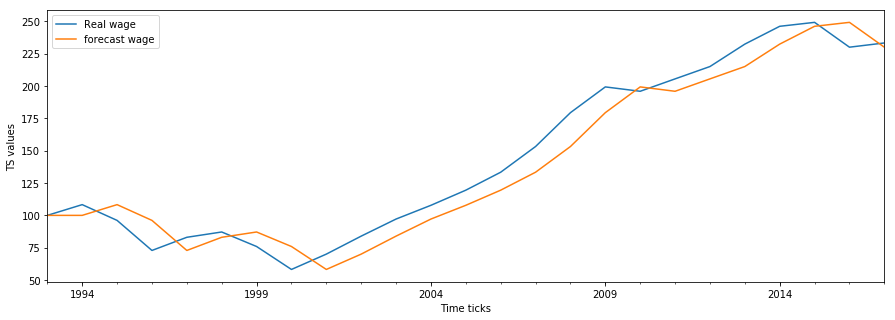

In [20]:
forecast = pd.DataFrame(index = ts3.index)
forecast['forecast wage'] = np.array(SSE(ts3, alpha = 1)[:-1])

fig=plt.figure(figsize=(15,5))


ts3.merge(forecast, right_index=True, left_index=True).plot(figsize = (15,5))

plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.show()

#plt.legend()

1) alpha is close to 0.

2) SES can be used for this TS, since we have short-term forecastings (h=1).

4) alpha is 1.

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

In [22]:
# Start with this code


###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NAN]*(T+h)
    
    l = x[0] # initialize ts level 
    s = np.array([np.NAN]*p) # initalize seasonality values (it must be vector of lenth p)
    s[0] = 0
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p -1]
            
            s_saved = s[cntr % p]
            s[cntr % p] = delta*(x[cntr] - l) + (1-delta)*s[cntr % p] 
            l = alpha*(x[cntr] - s_saved) + (1-alpha)*l            
        
        FORECAST[cntr+h] = l + s[(cntr + h % p) % p]
    return FORECAST

In [23]:
# Example: run forecast:
h = 1
rng = pd.date_range(ts1.index[-1]+timedelta(h), ts1.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts1.index.append(rng), columns = ts.columns)
#     Quality = [np.NaN]*len(ts)
Qualities=[]
alphas = np.arange(0, 101, 5)*(1/100.)
deltas = alphas

# 60 = adaptation period
for cntr in ts.columns:
    for alpha in alphas:
        for delta in deltas:
            w_frc_ts[cntr] = WintersExponentialSmoothing(ts1[cntr], h, {'alpha':alpha, 'delta': delta, 'seasonality_period': 12})
            Qualities.append((float(qualitySSE(ts1[60:], w_frc_ts[60:])),'alpha: '+ str(alpha), 'delta: '+ str(delta)))            
            
min(Qualities, key = lambda x:x[0])

(3035.798623053637, 'alpha: 0.75', 'delta: 0.7')

In [24]:
w_frc_ts = pd.DataFrame(index = ts1_1.index)

w_frc_ts["Winter's model forecast"] = np.array(WintersExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.75, 'delta': 0.7, 'seasonality_period': 12})[:-1])

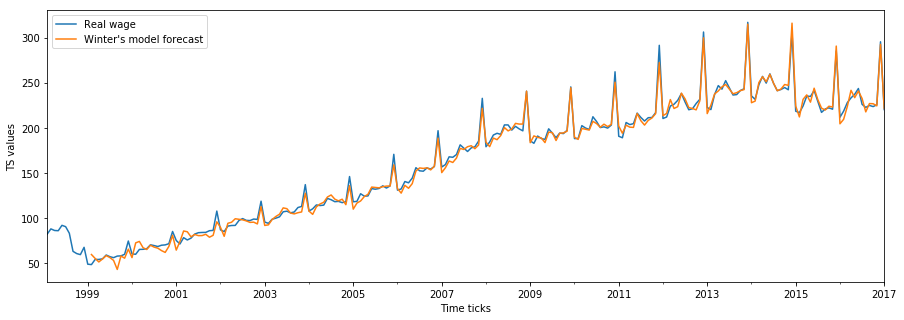

In [25]:
forecast = w_frc_ts

ts1_1.merge(forecast, right_index=True, left_index=True).plot(figsize = (15,5))

# plt.plot(ts1_1, color = 'b')
# plt.plot(forecast, color = 'r', alpha = 0.9)

plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.show()

In [26]:
w_frc_ts_1 = w_frc_ts.loc['2016-01-02':'2017-01-01']
qualitySSE(ts2['Real wage'], w_frc_ts_1["Winter's model forecast"])

284.03296661300453

2) Optimal params for alpha and delta are 0.75 and 0.7 respectively.

4) Accuracy of Winter's model is less than accuracy of SSE model, so Winter's ES can be used for this TS.

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [27]:
def Theil_WageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NAN]*(T+h)
    
    l = x[0] 
    b = x[0]
    s = np.array([np.NAN]*p) 
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p -1]
            
            l_saved = l
            l = alpha*(x[cntr] - s[cntr % p]) + (1-alpha)*(l+b)
            b = beta*(l - l_saved) + (1-beta)*b
            s[cntr % p] = gamma*(x[cntr] - l) + (1- gamma)*s[cntr % p] 
                        
        
        FORECAST[cntr+h] = l + b*h + s[(cntr + h % p) % p]
    return FORECAST

In [28]:
h = 1
rng = pd.date_range(ts1.index[-1]+timedelta(h), ts1.index[-1]+timedelta(h))

T_frc_ts = pd.DataFrame(index = ts1.index.append(rng), columns = ts1.columns)

Qualities=[]
alphas = np.arange(10)*(1/10.)
betas = alphas
gammas = alphas

# adaptation period = 60
for cntr in ts.columns:
    for alpha in alphas:
        for beta in betas:
            for gamma in gammas:
                T_frc_ts[cntr] = Theil_WageExponentialSmoothing(ts1[cntr], h, {'alpha':alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 12})
                Qualities.append((float(qualitySSE(ts1[60:], T_frc_ts[60:])),'alpha: '+ str(alpha), 'beta: '+ str(beta), 'gamma: '+ str(gamma)))            
            
min(Qualities, key = lambda x:x[0])

(4705.6185587950085, 'alpha: 0.2', 'beta: 0.1', 'gamma: 0.9')

In [39]:
T_frc_ts = pd.DataFrame(index = ts1_1.index)

T_frc_ts["Theil-Wage's model forecast"] = np.array(Theil_WageExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.2, 'beta': 0.1, 'gamma': 0.9, 'seasonality_period': 12})[:-1])

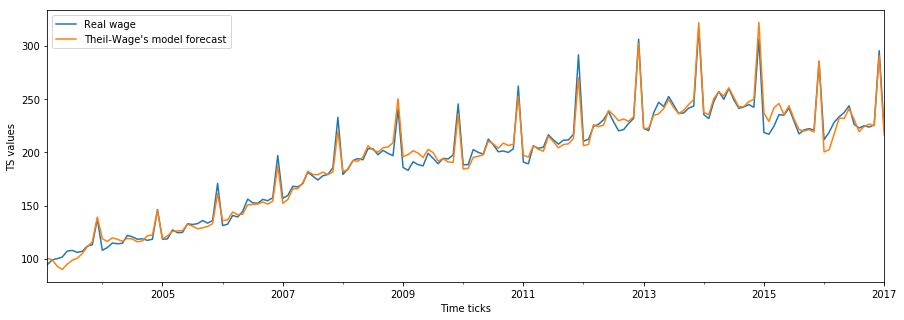

In [32]:
forecast = T_frc_ts

ts1_1[60:].merge(forecast[60:], right_index=True, left_index=True).plot(figsize = (15,5))


# plt.plot(ts1_1, color = 'b')
# plt.plot(forecast, color = 'r', alpha = 0.9)

plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.show()

In [34]:
T_frc_ts_1 = T_frc_ts.loc['2016-01-02':'2017-01-01']
qualitySSE(ts2['Real wage'], T_frc_ts_1["Theil-Wage\'s model forecast"])

515.01562471579916

2) Optimal params for alpha, beta and gamma are 0.2, 0.1 and 0.9 respectively.

4) Accuracy of Theil-Wage's model is less than accuracy of SSE model, but more than accuracy of Winter's model.

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

In [35]:
# Additive trend, multiplicative seasonality
def AMExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NAN]*(T+h)
    
    l = x[0] 
    b = x[0]
    s = np.array([np.NAN]*p) 
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p -1]
            
            l_saved = l
            l = alpha*(x[cntr] / s[cntr % p]) + (1-alpha)*(l+b)
            b = beta*(l - l_saved) + (1-beta)*b
            s[cntr % p] = gamma*(x[cntr] / l) + (1- gamma)*s[cntr % p] 
                        
        
        FORECAST[cntr+h] = (l + b*h) * s[(cntr + h % p) % p]
    return FORECAST

In [36]:
h = 1
rng = pd.date_range(ts1.index[-1]+timedelta(h), ts1.index[-1]+timedelta(h))

AM_frc_ts = pd.DataFrame(index = ts1.index.append(rng), columns = ts1.columns)

Qualities=[]
alphas = np.arange(10)*(1/10.)
betas = alphas
gammas = alphas

# adaptation period = 60

for cntr in ts.columns:
    for alpha in alphas:
        for beta in betas:
            for gamma in gammas:
                AM_frc_ts[cntr] = AMExponentialSmoothing(ts1[cntr], h, {'alpha':alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 12})
                Qualities.append((float(qualitySSE(ts1[60:], AM_frc_ts[60:])),'alpha: '+ str(alpha), 'beta: '+ str(beta), 'gamma: '+ str(gamma)))            
            
min(Qualities, key = lambda x:x[0])

(4045.552433250092, 'alpha: 0.2', 'beta: 0.1', 'gamma: 0.9')

Optimal params for alpha, beta and gamma are 0.2, 0.1 and 0.9 respectively.

In [42]:
AM_frc_ts = pd.DataFrame(index = ts1_1.index)

AM_frc_ts["Holt-Winter's model forecast"] = np.array(AMExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.2, 'beta': 0.1, 'gamma': 0.9, 'seasonality_period': 12})[:-1])

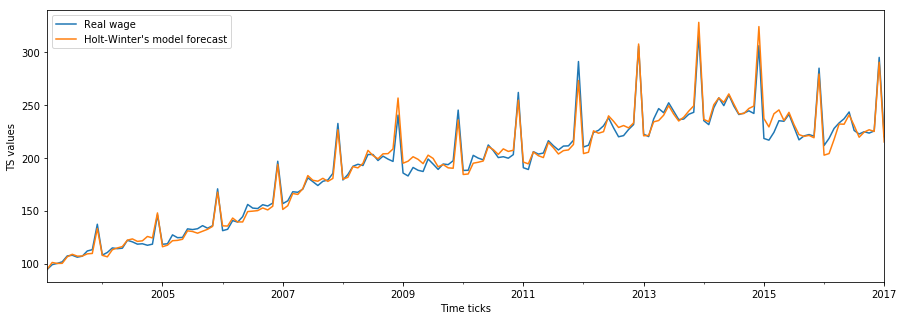

In [43]:
forecast = AM_frc_ts

ts1_1[60:].merge(forecast[60:], right_index=True, left_index=True).plot(figsize = (15,5))


plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.show()

In [46]:
AM_frc_ts_1 = AM_frc_ts.loc['2016-01-02':'2017-01-01']
qualitySSE(ts2['Real wage'], AM_frc_ts_1["Holt-Winter's model forecast"])

440.57071004438342

Now we change additive component

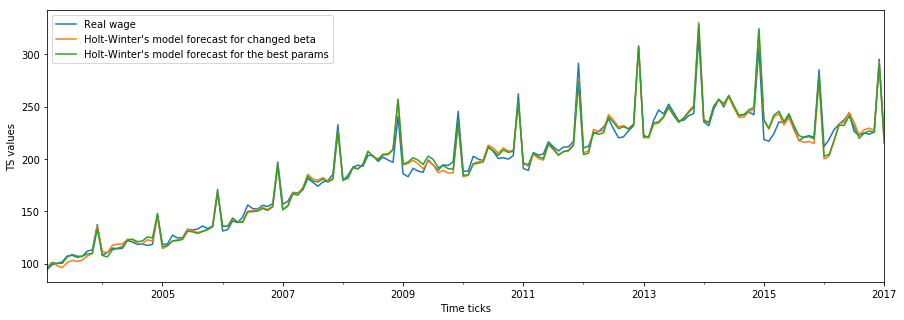

In [47]:
forecast = pd.DataFrame(index = ts1_1.index)

forecast["Holt-Winter's model forecast for changed beta"] = np.array(AMExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.2, 'beta': 0.2, 'gamma': 0.9, 'seasonality_period': 12})[:-1])

forecast["Holt-Winter's model forecast for the best params"] = np.array(AMExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.2, 'beta': 0.1, 'gamma': 0.9, 'seasonality_period': 12})[:-1])

ts1_1[60:].merge(forecast[60:], right_index=True, left_index=True).plot(figsize = (15,5))


plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.show()

Now we change multiplicative component

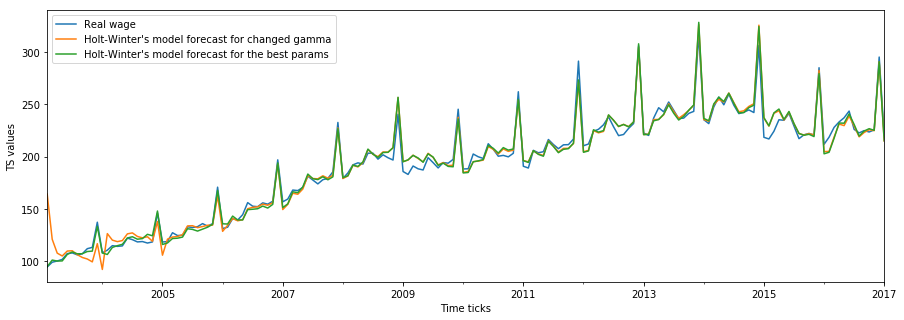

In [49]:
forecast = pd.DataFrame(index = ts1_1.index)

forecast["Holt-Winter's model forecast for changed gamma"] = np.array(AMExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.2, 'beta': 0.1, 'gamma': 0.7, 'seasonality_period': 12})[:-1])

forecast["Holt-Winter's model forecast for the best params"] = np.array(AMExponentialSmoothing(ts1_1['Real wage'], 1, {'alpha':0.2, 'beta': 0.1, 'gamma': 0.9, 'seasonality_period': 12})[:-1])

ts1_1[60:].merge(forecast[60:], right_index=True, left_index=True).plot(figsize = (15,5))


plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.show()

2) Optimal params for alpha, beta and gamma are 0.2, 0.1 and 0.9 respectively.

4) Accuracy of ESM(AM) model is less than accuracy of Theil-Wage's model, but more than accuracy of Winter's model.